In [39]:
"""
Units of quantities--->
torque: N/m
pressures: bar
air/water flow: Lt/min
noise: db
ground accelerations along x,y,z axes (gaxxy,gaccy,gaccz): m/s^2
head accelerations (haxxy,haccy,haccz) along x,y,z axes: m/s^2
rpm: revolutions/min
powers: Watt
temperatures: (degree)C
source: https://www.kaggle.com/datasets/afumetto/predictive-maintenance-dataset-air-compressor?select=data.csv
"""

'\nUnits of quantities--->\ntorque: N/m\npressures: bar\nair/water flow: Lt/min\nnoise: db\nground accelerations along x,y,z axes (gaxxy,gaccy,gaccz): m/s^2\nhead accelerations (haxxy,haccy,haccz) along x,y,z axes: m/s^2\nrpm: revolutions/min\npowers: Watt\ntemperatures: (degree)C\nsource: https://www.kaggle.com/datasets/afumetto/predictive-maintenance-dataset-air-compressor?select=data.csv\n'

In [40]:
# Load dataset
import pandas as pd
df=pd.read_csv("data.csv")

In [41]:
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,Ok,Ok,Clean,Clean,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,Ok,Ok,Clean,Clean,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,Ok,Ok,Clean,Clean,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,Ok,Ok,Clean,Clean,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,Ok,Ok,Clean,Clean,Stable


In [42]:
# Names of columns
df.columns

Index(['id', 'rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
       'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
       'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
       'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz',
       'bearings', 'wpump', 'radiator', 'exvalve', 'acmotor'],
      dtype='object')

In [43]:
# Since we have a Double Reciprocating Compressor: for us, air_flow will be 2*(air_flow rate of this dataset)
df['air_flow']=2*df['air_flow']

In [44]:
# No. of rows
len(df)

1000

In [45]:
# Checking for datatypes
df.dtypes

id                       int64
rpm                      int64
motor_power            float64
torque                 float64
outlet_pressure_bar    float64
air_flow               float64
noise_db               float64
outlet_temp            float64
wpump_outlet_press     float64
water_inlet_temp       float64
water_outlet_temp      float64
wpump_power            float64
water_flow             float64
oilpump_power          float64
oil_tank_temp          float64
gaccx                  float64
gaccy                  float64
gaccz                  float64
haccx                  float64
haccy                  float64
haccz                  float64
bearings                object
wpump                   object
radiator                object
exvalve                 object
acmotor                 object
dtype: object

In [46]:
# Data Descritpion
df.describe()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,wpump_power,water_flow,oilpump_power,oil_tank_temp,gaccx,gaccy,gaccz,haccx,haccy,haccz
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1499.516000,6984.877371,49.186120,4.054049,1509.347859,53.412121,118.855110,2.799610,83.021711,...,222.185445,53.708176,300.484123,46.237663,0.601789,0.349667,3.923073,1.101253,1.350042,3.495037
std,288.819436,707.681915,4269.277571,18.706750,1.862761,885.486982,8.055363,19.120181,0.455274,18.644992,...,3.774537,6.587259,0.408703,0.196139,0.058719,0.040667,1.610130,0.058546,0.040871,0.817667
min,1.000000,480.000000,1402.424603,13.222197,1.000000,190.197904,39.879017,76.902822,1.834533,43.166392,...,213.525207,38.570791,299.507859,45.806178,0.540045,0.274650,1.730301,1.039910,1.270696,2.329267
25%,250.750000,988.750000,3559.437042,33.749857,2.443750,610.776303,46.490976,104.731080,2.448208,68.914714,...,219.471768,50.459245,300.187873,46.090060,0.558092,0.316543,2.576739,1.057717,1.318785,2.802622
50%,500.500000,1500.000000,5906.662534,48.890905,4.038000,1217.252823,52.708480,118.275842,2.780492,82.101660,...,221.889622,58.112667,300.470013,46.236213,0.576814,0.349343,3.610639,1.075392,1.348189,3.339698
75%,750.250000,2010.000000,9636.002782,63.672921,5.600250,2386.532545,60.158248,132.850790,3.092101,95.792346,...,224.721620,58.552897,300.774788,46.378237,0.615021,0.375261,5.081960,1.113696,1.375232,4.071874
max,1000.000000,2520.000000,19454.559080,93.540405,8.664000,3079.823268,74.401986,172.711382,4.295136,137.543531,...,235.342910,59.174992,301.435483,46.755690,0.726604,0.459811,9.209166,1.227134,1.461809,6.107852


In [47]:
# Checking for NULL values
df.isna().sum()

id                     0
rpm                    0
motor_power            0
torque                 0
outlet_pressure_bar    0
air_flow               0
noise_db               0
outlet_temp            0
wpump_outlet_press     0
water_inlet_temp       0
water_outlet_temp      0
wpump_power            0
water_flow             0
oilpump_power          0
oil_tank_temp          0
gaccx                  0
gaccy                  0
gaccz                  0
haccx                  0
haccy                  0
haccz                  0
bearings               0
wpump                  0
radiator               0
exvalve                0
acmotor                0
dtype: int64

In [48]:
df['bearings'].unique()

array(['Ok', 'Noisy'], dtype=object)

In [49]:
# Mapping the string data
df['bearings']=df['bearings'].map({'Ok': 0, 'Noisy': 1})

In [50]:
df['radiator'].unique()

array(['Clean', 'Dirty'], dtype=object)

In [51]:
# Mapping the string data
df['radiator']=df['radiator'].map({'Clean': 0, 'Dirty': 1})

In [52]:
df['acmotor'].unique()

array(['Stable'], dtype=object)

In [53]:
# Mapping the string data
df['acmotor']=df['acmotor'].map({'Stable': 0})

In [54]:
df['wpump'].unique()

array(['Ok', 'Noisy'], dtype=object)

In [55]:
# Mapping the string data
df['wpump']=df['wpump'].map({'Ok': 0, 'Noisy': 1})

In [56]:
df['exvalve'].unique()

array(['Clean', 'Dirty'], dtype=object)

In [57]:
# Mapping the string data
df['exvalve']=df['exvalve'].map({'Clean': 0, 'Dirty': 1})

Text(0.5, 1.0, 'Motor Power')

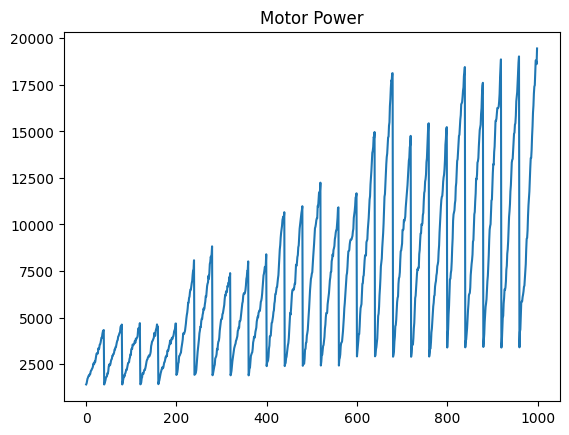

In [58]:
# Data Visualization for understanding
import matplotlib.pyplot as plt
df['motor_power'].plot()
plt.title("Motor Power")

Text(0.5, 1.0, 'RPM')

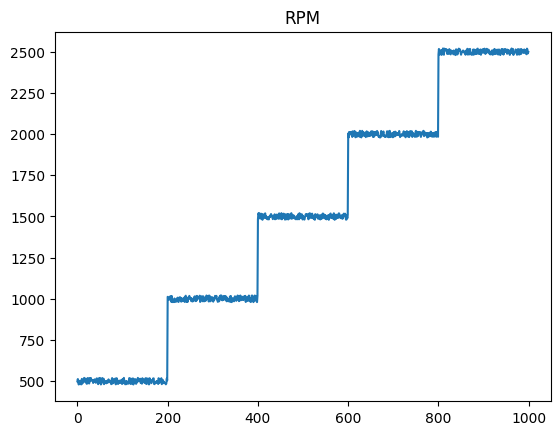

In [59]:
df['rpm'].plot()
plt.title("RPM")

Text(0.5, 1.0, 'Torque')

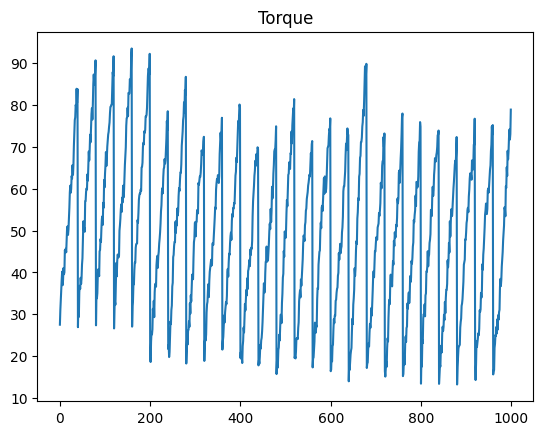

In [60]:
df['torque'].plot()
plt.title("Torque")

Text(0.5, 1.0, 'Outlet Pressure')

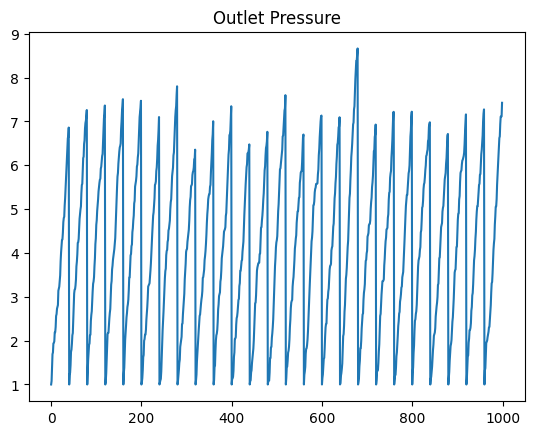

In [61]:
df['outlet_pressure_bar'].plot()
plt.title("Outlet Pressure")

Text(0.5, 1.0, 'Air flow')

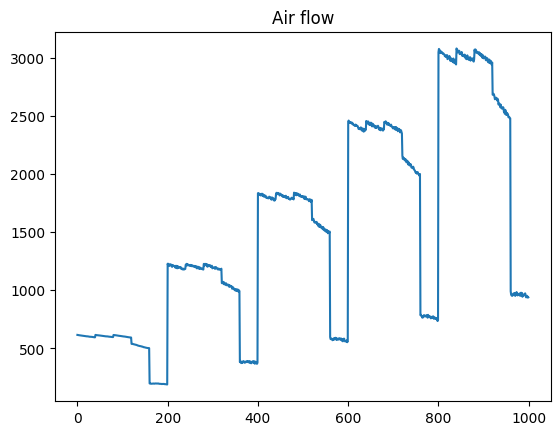

In [62]:
df['air_flow'].plot()
plt.title("Air flow")

Text(0.5, 1.0, 'Outlet Temperature')

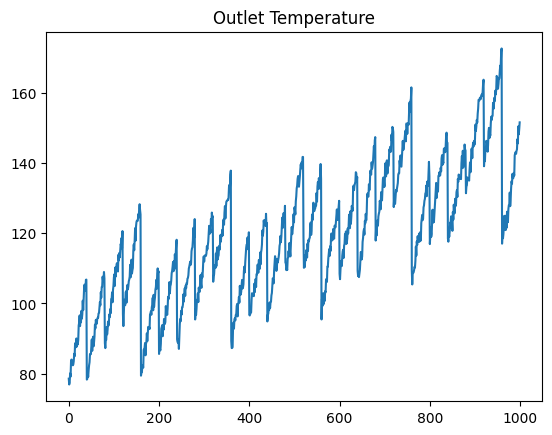

In [63]:
import matplotlib.pyplot as plt
df['outlet_temp'].plot()
plt.title("Outlet Temperature")

Text(0.5, 1.0, 'Noise')

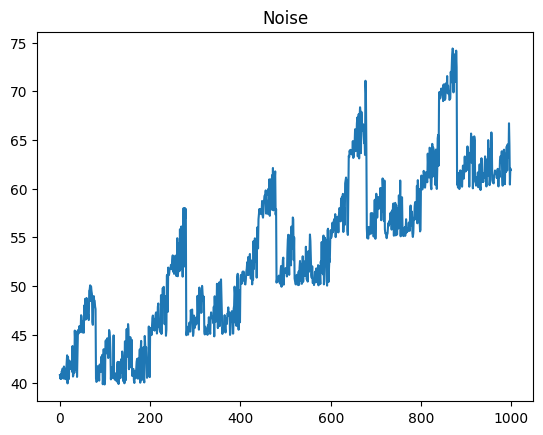

In [64]:
df['noise_db'].plot()
plt.title('Noise')

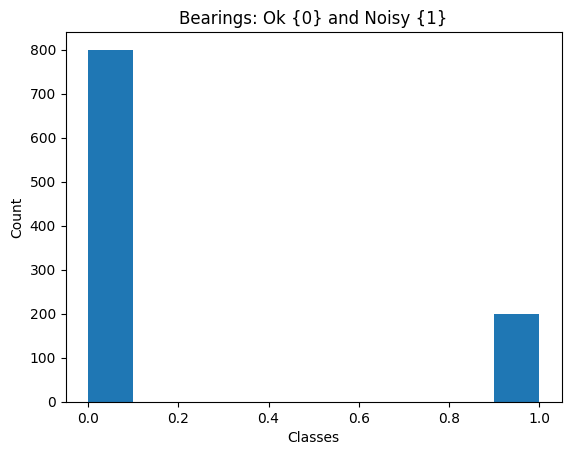

In [65]:
label_counts = df['bearings'].value_counts()
df['bearings'].hist()
plt.title('Bearings: Ok {0} and Noisy {1}')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
plt.show()

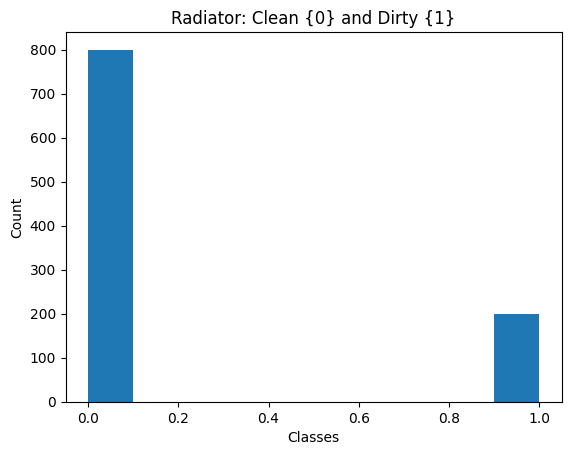

In [66]:
label_counts = df['radiator'].value_counts()
df['radiator'].hist()
plt.title('Radiator: Clean {0} and Dirty {1}')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
plt.show()

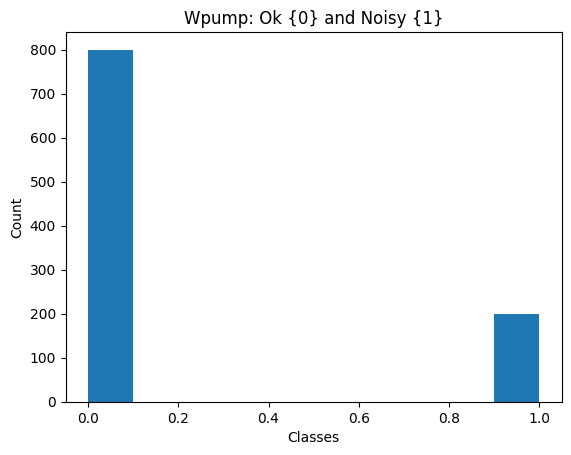

In [67]:
label_counts = df['wpump'].value_counts()
df['wpump'].hist()
plt.title('Wpump: Ok {0} and Noisy {1}')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
plt.show()

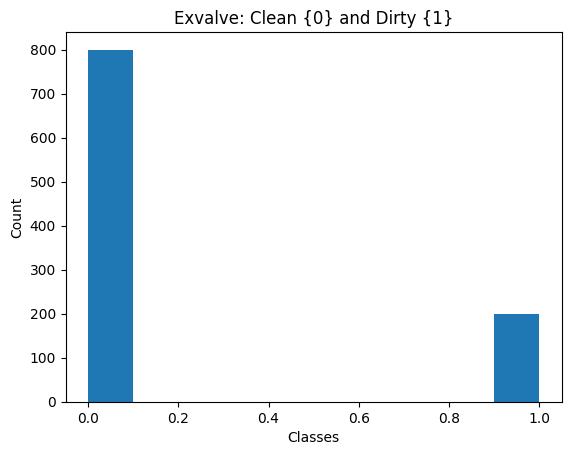

In [68]:
label_counts = df['exvalve'].value_counts()
df['exvalve'].hist()
plt.title('Exvalve: Clean {0} and Dirty {1}')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Oil Tank Temperature')

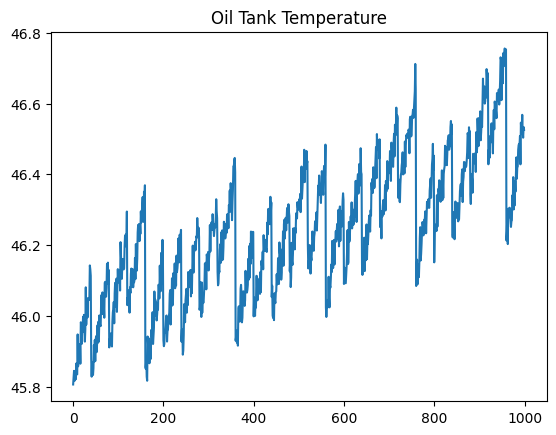

In [69]:
df['oil_tank_temp'].plot()
plt.title("Oil Tank Temperature")

Text(0.5, 1.0, 'Water Flow')

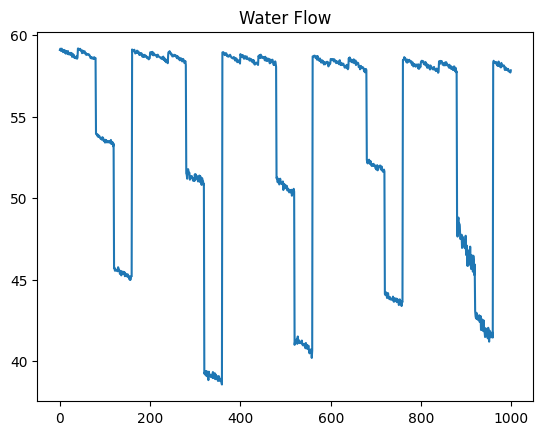

In [70]:
df['water_flow'].plot()
plt.title("Water Flow")

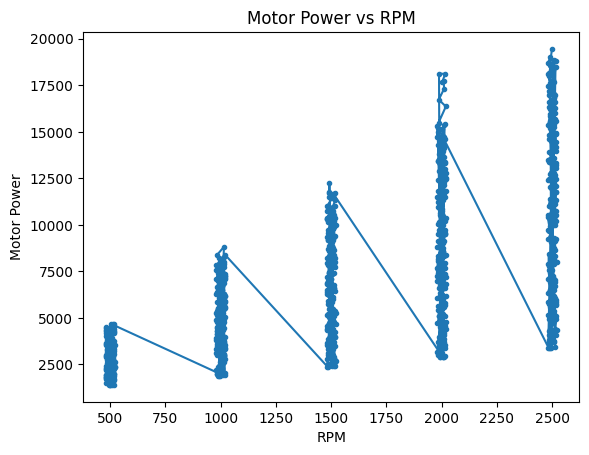

In [71]:
plt.plot(df['rpm'], df['motor_power'], marker='.', linestyle='-')
plt.title('Motor Power vs RPM')
plt.xlabel('RPM')
plt.ylabel('Motor Power')
plt.show()

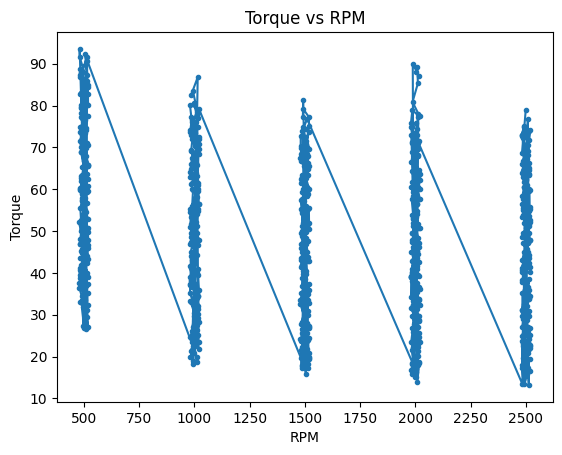

In [72]:
plt.plot(df['rpm'], df['torque'], marker='.', linestyle='-')
plt.title('Torque vs RPM')
plt.xlabel('RPM')
plt.ylabel('Torque')
plt.show()

In [73]:
# Formatted data
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,616.579758,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0,0
1,2,513,1457.370092,31.030115,1.081,615.667472,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0,0
2,3,495,1582.249959,33.484653,1.369,614.755186,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0,0
3,4,480,1712.466820,36.394475,1.691,613.950497,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0,0
4,5,498,1766.035170,38.249154,1.731,613.664264,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,0,0,0,0,0


In [74]:
# Checking datatypes (all numerical required)
df.dtypes

id                       int64
rpm                      int64
motor_power            float64
torque                 float64
outlet_pressure_bar    float64
air_flow               float64
noise_db               float64
outlet_temp            float64
wpump_outlet_press     float64
water_inlet_temp       float64
water_outlet_temp      float64
wpump_power            float64
water_flow             float64
oilpump_power          float64
oil_tank_temp          float64
gaccx                  float64
gaccy                  float64
gaccz                  float64
haccx                  float64
haccy                  float64
haccz                  float64
bearings                 int64
wpump                    int64
radiator                 int64
exvalve                  int64
acmotor                  int64
dtype: object

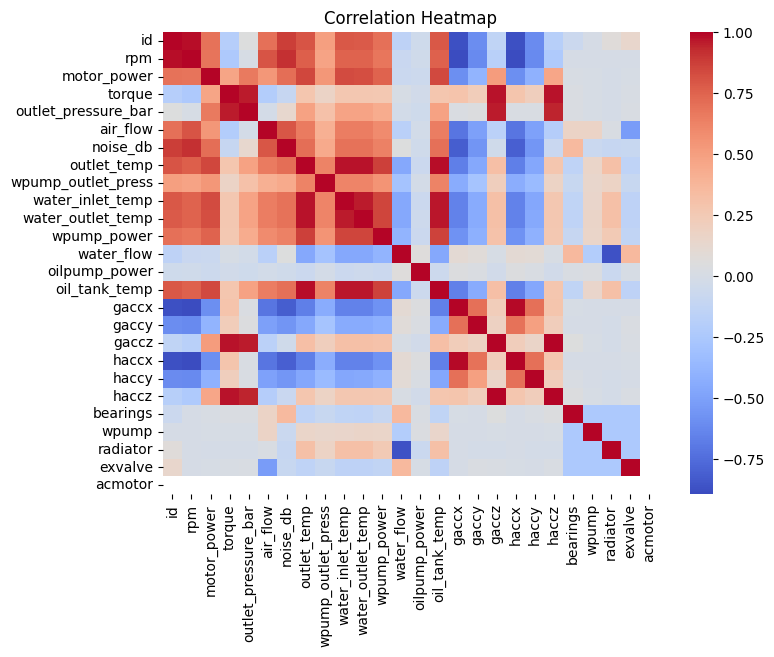

In [75]:
# Observing Correlation for feature selection
import seaborn as sns
correlation_matrix = df.corr()
# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [76]:
import pandas as pd
df.to_csv('processed_data.csv', index=False)